In [11]:
# -------------------------------------------Dimensionaly Reduction---------------------------------------------------


import pandas as pd
original_dataset = pd.read_csv('/Users/mukil/Desktop/Water Quality Prediction.csv')

desired_instances = 352250

if len(original_dataset) > desired_instances:
    sampled_dataset = original_dataset.sample(n=desired_instances, random_state=42)

    sampled_dataset.to_csv('WaterQuality_Updated_dataset.csv', index=False)
    
    print(f"Successfully sampled {desired_instances} instances and saved to 'WaterQuality_Updated_dataset.csv'.")
else:
    print("The original dataset has fewer instances than the desired number.")


Successfully sampled 352250 instances and saved to 'WaterQuality_Updated_dataset.csv'.


In [12]:


df = pd.read_csv('WaterQuality_Updated_dataset.csv')
df

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
0,781974,7.004799,0.000006,7.114755,120.527769,4.620000e-168,1.564359,Near Colorless,0.613998,1.758451,...,3.099394,4.469775e-02,257.717511,Reservoir,22.900917,54.310518,January,7.0,6.0,0
1,937737,8.299823,0.001846,4.713490,220.284903,9.040000e-120,2.196456,Faint Yellow,1.543039,4.341496,...,3.749201,8.410000e-05,92.378364,Ground,64.103574,72.016863,March,6.0,1.0,0
2,907828,8.077128,0.001998,6.999236,157.332074,1.740000e-137,1.900052,Faint Yellow,0.363389,0.537449,...,2.215031,1.954040e-04,187.093504,Well,26.600483,74.400507,October,6.0,14.0,0
3,784628,7.813995,0.001145,6.168141,200.820979,1.970000e-06,4.961851,Near Colorless,0.731114,0.073730,...,3.030572,4.894026e-02,334.951667,Ground,16.434954,98.879709,February,11.0,9.0,0
4,662460,6.691067,0.506861,8.280426,143.161413,7.280000e-111,5.546948,Colorless,0.026614,1.532804,...,3.105734,3.490000e-18,211.253831,Lake,12.467716,46.854295,February,20.0,13.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352245,283892,9.267843,0.048816,4.609375,193.737576,6.910000e-78,3.520866,Yellow,1.946864,1.769707,...,3.526083,5.916056e-03,138.654980,Aquifer,15.349777,47.296662,October,10.0,3.0,1
352246,227801,7.870140,0.005893,6.455013,114.118282,2.160000e-53,0.402987,Colorless,0.001515,0.899148,...,3.960572,6.270000e-05,300.909825,River,17.699778,79.364375,March,12.0,12.0,0
352247,337393,7.092725,0.000038,3.350373,89.419693,1.670000e-129,2.485154,Yellow,0.071523,0.165758,...,2.935636,2.434026e-01,269.744020,Well,14.459401,77.361721,September,14.0,18.0,1
352248,702572,7.038244,1.455031,3.919473,179.126716,0.000000e+00,0.413567,Faint Yellow,2.553970,0.126924,...,3.515317,5.368611e-02,369.494524,Lake,29.996500,84.798392,June,12.0,1.0,1


In [12]:
# ---------------------------------Preprocessing of Dataset-------------------------------


In [13]:

# Now Removing unwanted attributes

# List of attributes to remove
attributes_to_remove = ['Index','Lead','Source', 'Water Temperature','Air Temperature','Month','Day','Time of Day']

for attribute in attributes_to_remove:
    if attribute in df.columns:
        df = df.drop(columns=[attribute], axis=1)
        print(f"The attribute '{attribute}' has been removed from the dataset.")
    else:
        print(f"The attribute '{attribute}' does not exist in the dataset.")

df.sample(20)

The attribute 'Index' has been removed from the dataset.
The attribute 'Lead' has been removed from the dataset.
The attribute 'Source' has been removed from the dataset.
The attribute 'Water Temperature' has been removed from the dataset.
The attribute 'Air Temperature' has been removed from the dataset.
The attribute 'Month' has been removed from the dataset.
The attribute 'Day' has been removed from the dataset.
The attribute 'Time of Day' has been removed from the dataset.


,pH,Iron,Nitrate,Chloride,Zinc,Color,Turbidity,Fluoride,Copper,Odor,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Target
80010,7.683196,5.620000e-06,9.805757,146.118389,3.899385,Near Colorless,0.394607,0.902398,0.382258,2.844775,165.460208,554.945976,NaN,6.244055e-03,246.173124,0
248924,6.758617,1.948560e-01,3.404585,328.331582,0.967730,Light Yellow,1.647465,0.677612,0.025445,3.116841,160.543837,629.081424,2.746927,1.323798e+00,100.826986,1
170407,8.150955,6.170000e-08,3.196954,234.242432,0.555384,Colorless,0.070571,0.507624,0.444791,3.179554,118.409079,111.817335,3.519965,9.541691e-03,494.709219,0
118549,5.605638,3.280000e-06,11.732317,153.578989,0.815258,Faint Yellow,2.169369,6.168011,0.208223,0.949510,100.313646,693.892419,3.504799,8.970952e-02,233.334063,0
61731,8.389716,3.055958e-03,8.887557,154.174618,0.464117,Colorless,0.641250,0.740575,0.147553,1.086190,109.907108,421.294735,3.971607,3.695540e-04,414.991852,0
56439,7.348979,1.273840e-01,4.232841,194.074135,0.000514,Near Colorless,NaN,1.325280,0.700815,3.281392,108.916652,167.292267,3.431262,9.757130e-04,398.066296,1
254220,8.173690,2.602270e-04,6.550650,77.861897,1.040913,Colorless,1.989443,1.486321,2.262246,0.555160,175.765269,449.764412,3.093814,1.260000e-05,234.820075,1
192343,7.434524,NaN,3.618103,114.503787,0.671526,Faint Yellow,0.273798,1.364113,0.116143,0.361146,138.611511,286.650857,2.556238,8.511350e-03,31.099652,0
174512,7.680720,2.625039e-02,4.522523,204.236715,0.683233,Colorless,0.004632,0.193066,0.545128,2.098620,125.257570,514.179753,2.520263,2.204030e-04,304.070554,0
158679,7.558586,5.220000e-05,2.625354,165.847197,0.513471,Near Colorless,0.043368,1.525777,0.112897,0.346214,145.755684,252.645771,2.582819,2.150356e-02,405.421498,0


In [14]:
values = ['Iron', 'Manganese']
df[values].sample(20)

,Iron,Manganese
47605,3.660546e-02,4.140150e-04
333790,5.820000e-06,4.101680e-04
55168,5.660000e-09,2.500000e-05
48639,5.380000e-08,5.452850e-04
224915,1.426757e-01,1.230000e-11
56932,8.116139e-03,1.040000e-06
118117,1.950000e-06,8.780000e-08
315745,7.651277e-02,2.654525e-02
34818,4.898639e-02,1.066394e-03
184240,3.504871e-02,9.340308e-03


In [15]:

# Convert values in scientific notation to normal form
df['Iron'] = df['Iron'].apply(lambda x: '{:.6f}'.format(x))
df['Manganese'] = df['Manganese'].apply(lambda x: '{:.6f}'.format(x))

print(df.sample(10))


              pH      Iron    Nitrate    Chloride      Zinc           Color  \
303821  7.618519  0.015092   3.928714  153.611617  2.324907    Light Yellow   
309169  7.275566  0.030803   6.153682  187.102105  2.046223          Yellow   
134107  6.931223  0.005283   6.351096  229.838236  1.526006       Colorless   
34125   6.699153  0.000011   3.849691  238.308524  0.291501       Colorless   
286026  7.441315  0.145813   4.747629  192.847083  2.305923       Colorless   
231369  7.696452  0.000002   5.038705  197.285393  1.013724       Colorless   
276378  5.768516  0.107469  11.569913  166.431715  0.025943          Yellow   
16433   6.909601  0.000024   6.587936  155.762762  2.820269       Colorless   
243963  8.314948  0.008466   8.871790  151.517905  0.766003  Near Colorless   
59868        NaN  0.000002   4.965798  221.879865  0.482928    Light Yellow   

        Turbidity  Fluoride    Copper      Odor     Sulfate  Conductivity  \
303821   0.001226  1.491711  0.119571  2.744729  179.

In [16]:
print(df['Color'].sample(20))

26844          Colorless
8928        Faint Yellow
281117      Light Yellow
229992      Light Yellow
7377      Near Colorless
62703          Colorless
279187         Colorless
67619          Colorless
29357             Yellow
133091      Faint Yellow
129145      Faint Yellow
309193      Light Yellow
244777    Near Colorless
223710      Faint Yellow
327884         Colorless
267106         Colorless
105823    Near Colorless
236795      Faint Yellow
24526          Colorless
147290            Yellow
Name: Color, dtype: object


In [17]:
# Doing the Label Encoding for the 'Color' Attribute for converting it into numeric
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
df['Color'] = label_encoder.fit_transform(df['Color'])

print(df.sample(10))


              pH      Iron    Nitrate    Chloride      Zinc  Color  Turbidity  \
10945   7.514278  0.168322   8.520541  191.558642  0.172071      0   0.044401   
163050  7.691278  0.577095  10.916470  136.781239  0.323116      1   0.099956   
318841  8.588091  0.000000   6.568000   97.996151  0.755751      0   0.010979   
140841  5.083754  0.000000   8.534274  398.056063  9.467990      4   0.002989   
50279   7.487121  0.000006   7.182263  207.715106  2.211605      1   0.073126   
295048  5.644060  0.074373   6.927770  144.294995  0.328031      3   0.020291   
217488  8.910667  0.000000   2.946738  132.483059  0.359567      3   0.197160   
315352  7.345361  0.048015   4.859781  107.884568  3.440871      0   0.328561   
207574  9.996572  0.000049   4.215570   90.156661  0.239170      0   0.073935   
168537  7.605744  0.000771   7.819985   84.512621  2.155516      0        NaN   

        Fluoride    Copper      Odor     Sulfate  Conductivity  Chlorine  \
10945   0.015354  2.150721  0.56

In [18]:

df['Iron'] = pd.to_numeric(df['Iron'], errors='coerce')
df['Manganese'] = pd.to_numeric(df['Manganese'], errors='coerce')

# filling missing values with mean
columns_to_fill = ['pH', 'Iron', 'Nitrate', 'Chloride', 'Zinc', 'Turbidity', 'Fluoride', 'Copper', 'Odor', 'Sulfate', 'Conductivity', 'Chlorine', 'Manganese', 'Total Dissolved Solids']
mean_values = df[columns_to_fill].mean()
df[columns_to_fill] = df[columns_to_fill].fillna(mean_values)

df.to_csv('modified_WQP_dataset.csv', index=False)




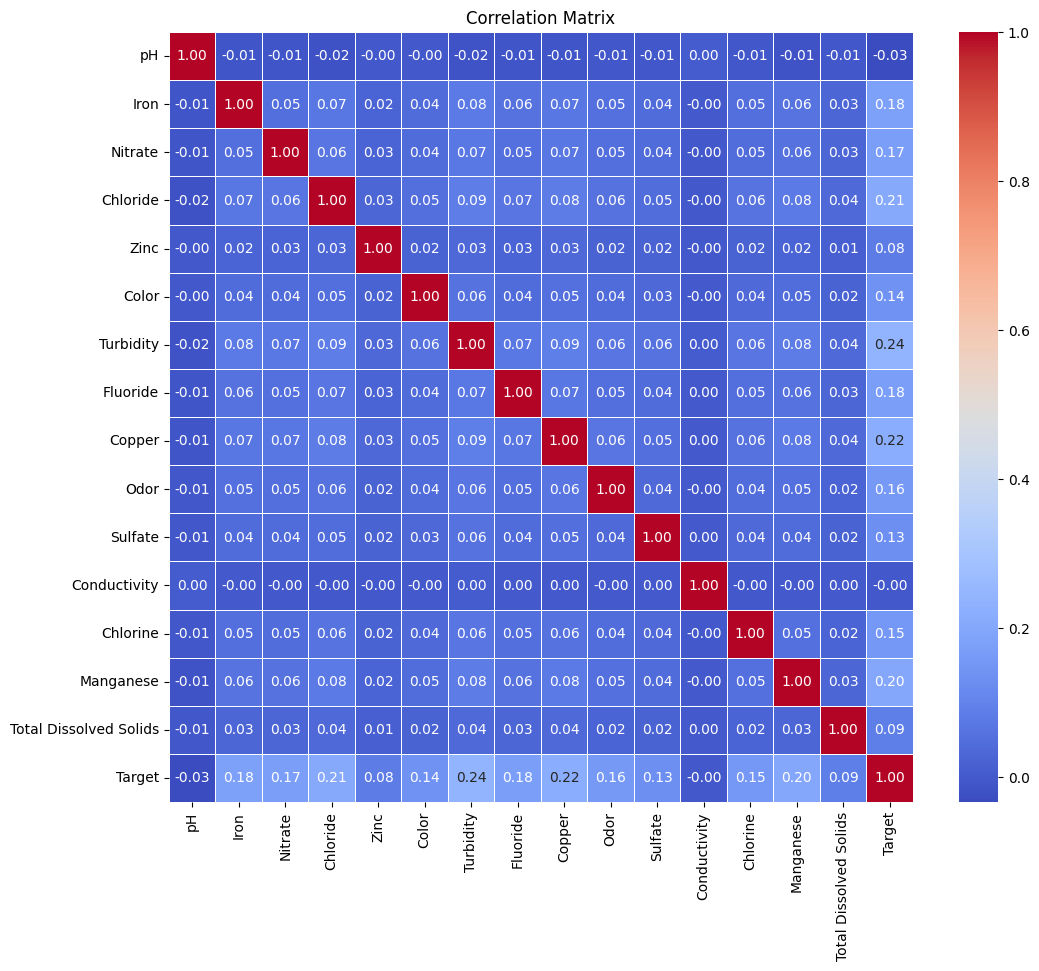

In [19]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [19]:
# -------------------------Training the Modified/ Preprocessed Dataset with different ML Algorithm---------------------

In [20]:
df2 = pd.read_csv('modified_WQP_dataset.csv')
# df2.info()
df2.sample(15)

,pH,Iron,Nitrate,Chloride,Zinc,Color,Turbidity,Fluoride,Copper,Odor,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Target
205568,8.205333,0.237263,7.834859,250.115792,1.470022,0,0.159941,0.478260,0.461673,1.345570,228.263460,545.687574,3.091367,0.001662,60.391243,0
129277,8.848753,0.000003,3.263650,123.072950,7.350520,3,3.740981,1.550780,0.679609,4.045108,184.605416,561.985307,3.763391,0.493234,563.930423,1
268654,8.312360,0.000000,1.804809,105.187633,0.542039,0,0.083537,1.838467,0.247851,1.128297,244.390611,463.143156,3.023443,0.005337,381.522226,0
107120,6.877593,0.000000,3.294959,146.819734,4.069133,3,0.054400,0.942923,0.494049,2.778782,130.835260,201.124220,3.249144,0.000000,182.999083,0
136133,6.898064,0.000003,5.585298,88.243656,0.633201,3,0.450542,1.200658,0.674569,2.558645,169.789596,425.032271,3.115551,0.002722,172.463031,0
293008,6.720346,0.216183,7.999138,596.276854,0.750703,2,0.113776,0.942923,5.732362,0.073910,132.480825,504.949153,3.737518,0.748401,231.387611,0
197255,6.327794,0.000000,5.352703,308.619064,2.524197,3,0.671178,3.060643,0.463313,0.892600,132.516398,218.570018,3.468825,0.000000,339.344262,0
214214,8.310140,0.181906,9.342094,90.931945,3.761969,3,0.409236,0.699188,2.329940,0.718056,247.649863,363.468854,4.625399,0.003514,102.197705,0
149873,6.838238,0.000000,3.796191,146.435429,0.421530,0,0.046911,2.012690,0.162650,1.920879,139.051083,471.739436,2.815790,0.000000,142.314403,0
104158,6.805957,0.001680,2.956238,229.269841,0.044464,0,0.039920,0.020556,0.606585,2.977330,90.134545,608.078413,3.263195,0.024900,466.773509,0


In [24]:
# --------------------Decision Tree Classification Algorithm-------------------------
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


X = df2.drop('Target', axis=1)
y = df2['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_classifier = DecisionTreeClassifier(random_state=42)

scores = cross_val_score(dt_classifier, X_train, y_train, cv=10)

dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report_result)
print(f"Cross-validation scores: {scores}")


Accuracy: 0.83

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89     54270
           1       0.64      0.62      0.63     16180

    accuracy                           0.83     70450
   macro avg       0.76      0.76      0.76     70450
weighted avg       0.83      0.83      0.83     70450

Cross-validation scores: [0.83026969 0.82899219 0.83193754 0.83867991 0.83066004 0.83229241
 0.83261178 0.83108588 0.83034067 0.83176011]


In [24]:
# --------------------KNN Classification Algorithm-------------------------


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score


X = df2.drop('Target', axis=1)
y = df2['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


knn_classifier = KNeighborsClassifier(n_neighbors=5)

knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

s
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report_result)


Accuracy: 0.79

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.93      0.87     54270
           1       0.57      0.31      0.40     16180

    accuracy                           0.79     70450
   macro avg       0.69      0.62      0.63     70450
weighted avg       0.76      0.79      0.76     70450



In [27]:
# --------------------Random Forest Classification Algorithm-------------------------
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Split the dataset into features (X) and target variable (y)
X = df2.drop('Target', axis=1)
y = df2['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")


Accuracy: 0.8727892122072392
Confusion Matrix:
[[46042  8228]
 [  734 15446]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.85      0.91     54270
           1       0.65      0.95      0.78     16180

    accuracy                           0.87     70450
   macro avg       0.82      0.90      0.84     70450
weighted avg       0.91      0.87      0.88     70450



In [28]:
# ---------------------------------Visualization------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



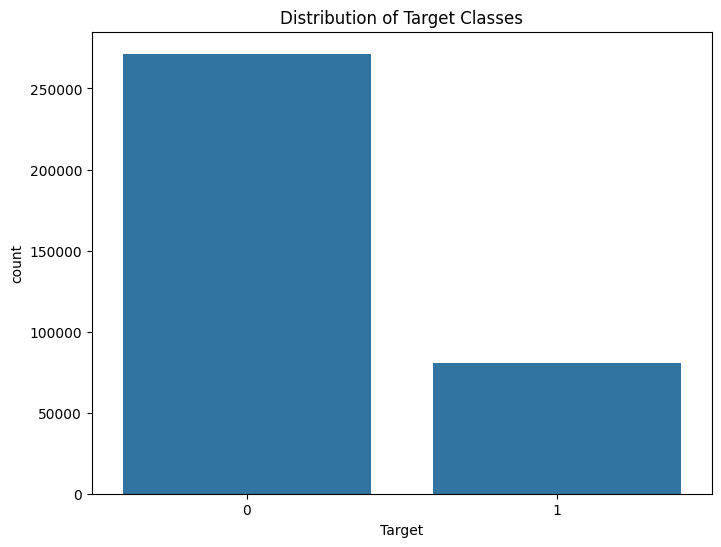

In [29]:
# -------------------Bar Plot---------------------
plt.figure(figsize=(8, 6))
sns.countplot(x='Target', data=df2)
plt.title('Distribution of Target Classes')
plt.show()


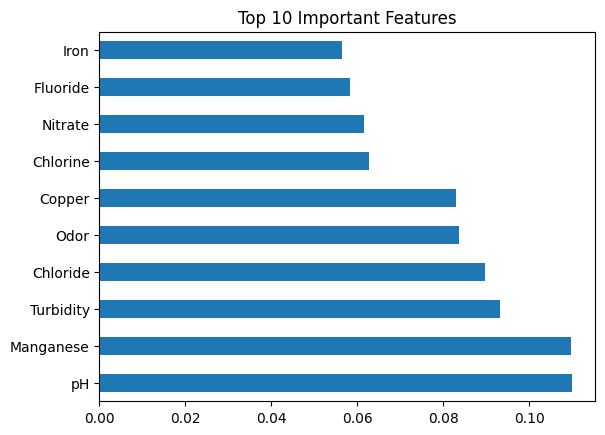

In [30]:
# -------------------Bar Plot or Heatmap---------------------
# Assuming you have trained a model named 'clf' (e.g., RandomForestClassifier)
feature_importance = pd.Series(clf.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.show()



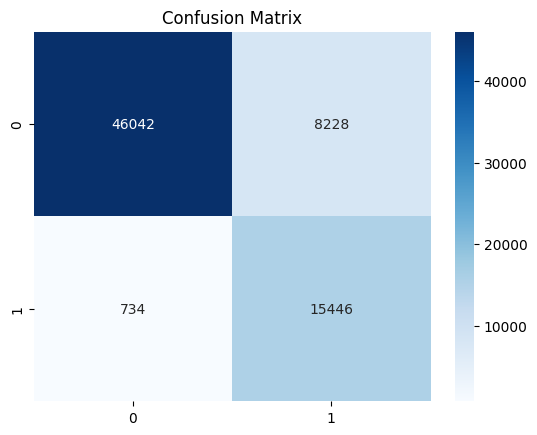

In [31]:
# --------------------------Heatmap--------------------random forest
from sklearn.metrics import confusion_matrix

# Assuming 'clf' is your trained model and 'X_test' is your test set
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


Fold 1 - Number of splits (k): 2
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.90    135714
           1       0.65      0.77      0.70     40411

    accuracy                           0.85    176125
   macro avg       0.79      0.82      0.80    176125
weighted avg       0.86      0.85      0.85    176125


Fold 2 - Number of splits (k): 2
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90    135713
           1       0.65      0.76      0.70     40412

    accuracy                           0.85    176125
   macro avg       0.79      0.82      0.80    176125
weighted avg       0.86      0.85      0.85    176125


Mean accuracy for Number of splits (k) = 2: 0.8503534421575585


Fold 1 - Number of splits (k): 3
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.90     90476
 

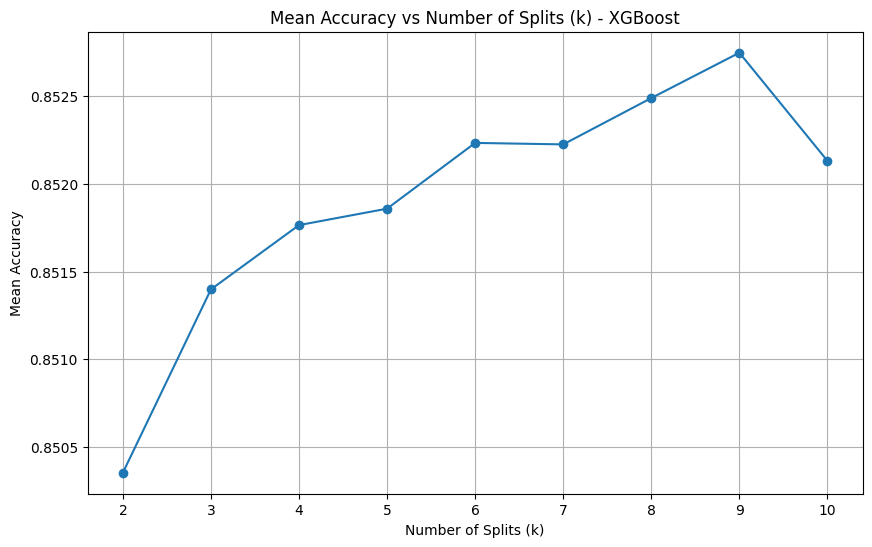

In [32]:
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



classifier = XGBClassifier(random_state=42)

k_values = range(2, 11)
mean_accuracies = []

for k in k_values:
    cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

    accuracies = []
    for fold, (train_idx, test_idx) in enumerate(cv.split(X, y), 1):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        classifier.fit(X_train, y_train)

        y_pred = classifier.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

        print(f'\nFold {fold} - Number of splits (k): {k}')
        print(f'Classification Report:\n{classification_report(y_test, y_pred)}')

    mean_accuracy = np.mean(accuracies)
    mean_accuracies.append(mean_accuracy)

    print(f'\nMean accuracy for Number of splits (k) = {k}: {mean_accuracy}\n')

plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_accuracies, marker='o')
plt.title('Mean Accuracy vs Number of Splits (k) - XGBoost')
plt.xlabel('Number of Splits (k)')
plt.ylabel('Mean Accuracy')
plt.grid(True)
plt.show()



Number of splits (k): 2
Accuracy for each fold: 0.8665209368346345
Mean accuracy: 0.8665209368346345

Number of splits (k): 3
Accuracy for each fold: 0.867250532292406
Mean accuracy: 0.867250532292406

Number of splits (k): 4
Accuracy for each fold: 0.8675940383250532
Mean accuracy: 0.8675940383250532

Number of splits (k): 5
Accuracy for each fold: 0.8677757274662882
Mean accuracy: 0.8677757274662882

Number of splits (k): 6
Accuracy for each fold: 0.8676224272533711
Mean accuracy: 0.8676224272533711

Number of splits (k): 7
Accuracy for each fold: 0.8675770049680624
Mean accuracy: 0.8675770049680624

Number of splits (k): 8
Accuracy for each fold: 0.8673782824698367
Mean accuracy: 0.8673782824698367

Number of splits (k): 9
Accuracy for each fold: 0.8679943222143364
Mean accuracy: 0.8679943222143364

Number of splits (k): 10
Accuracy for each fold: 0.8679403832505322
Mean accuracy: 0.8679403832505322

Classification Report for the Highest k (9) - Random Forest:
              precisi

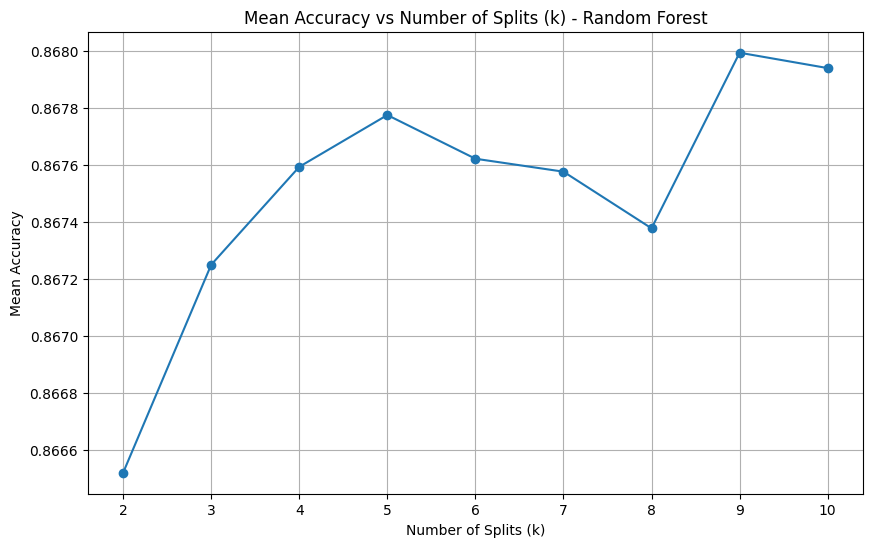

In [33]:
################################### RANDOM FOREST #################################

from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt


rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)

k_values = range(2, 11)
mean_accuracies = []
best_k = None
highest_mean_accuracy = 0.0
highest_classification_report = None

for k in k_values:
    cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

    y_pred = cross_val_predict(rf_classifier, X, y, cv=cv)
    accuracy = accuracy_score(y, y_pred)

    mean_accuracy = np.mean(accuracy)
    mean_accuracies.append(mean_accuracy)

    print(f'\nNumber of splits (k): {k}')
    print(f'Accuracy for each fold: {accuracy}')
    print(f'Mean accuracy: {mean_accuracy}')

    if mean_accuracy > highest_mean_accuracy:
        highest_mean_accuracy = mean_accuracy
        best_k = k
        highest_classification_report = classification_report(y, y_pred)

print(f'\nClassification Report for the Highest k ({best_k}) - Random Forest:')
print(highest_classification_report)

plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_accuracies, marker='o')
plt.title('Mean Accuracy vs Number of Splits (k) - Random Forest')
plt.xlabel('Number of Splits (k)')
plt.ylabel('Mean Accuracy')
plt.grid(True)
plt.show()


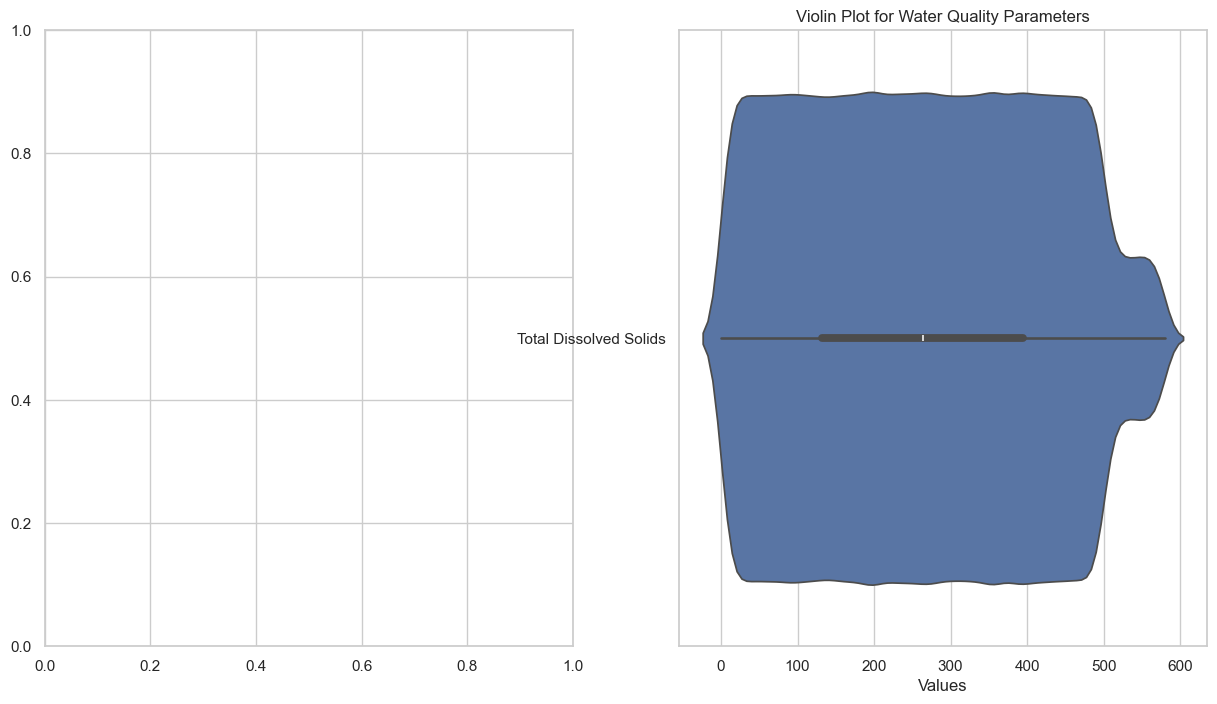

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  

columns_to_plot = ['Total Dissolved Solids'
                  ]

sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))



sns.violinplot(data=df2[columns_to_plot], ax=axes[1], orient='h')
axes[1].set_title('Violin Plot for Water Quality Parameters')
axes[1].set_xlabel('Values')

plt.show()


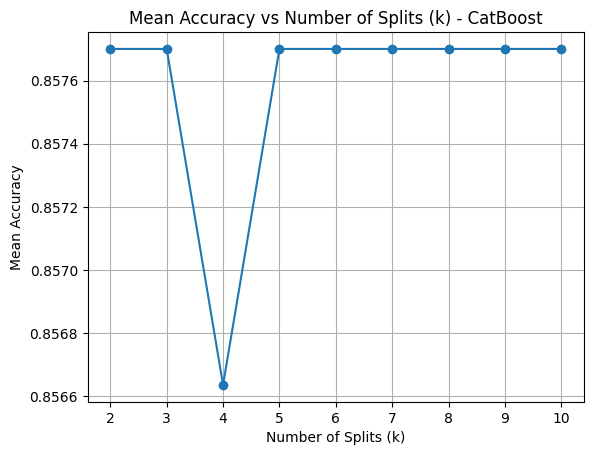

Best k value: 2
Classification Report for the Best Model:
              precision    recall  f1-score   support

           0       0.94      0.87      0.90     10901
           1       0.65      0.81      0.72      3189

    accuracy                           0.86     14090
   macro avg       0.79      0.84      0.81     14090
weighted avg       0.87      0.86      0.86     14090



In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


df_subset = df2.sample(frac=0.2, random_state=42)

X = df_subset.drop('Target', axis=1)
y = df_subset['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

catboost_classifier = CatBoostClassifier(iterations=100, random_state=42, verbose=0)

param_grid = {
    'depth': [6, 8],
    'learning_rate': [0.01, 0.1],
    'l2_leaf_reg': [3, 5]
}

k_values = range(1, 11)

mean_accuracies = []

for k in k_values:
    if k > 1:
        cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
        grid_search = GridSearchCV(catboost_classifier, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)

        best_catboost_classifier = grid_search.best_estimator_

        y_pred = best_catboost_classifier.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        mean_accuracies.append(accuracy)

plt.plot(list(k_values)[1:], mean_accuracies, marker='o')  
plt.title('Mean Accuracy vs Number of Splits (k) - CatBoost')
plt.xlabel('Number of Splits (k)')
plt.ylabel('Mean Accuracy')
plt.grid(True)
plt.show()

best_k_index = np.argmax(mean_accuracies)

best_k = k_values[best_k_index]

best_k = max(2, best_k)

cv = StratifiedKFold(n_splits=best_k, shuffle=True, random_state=42)
grid_search = GridSearchCV(catboost_classifier, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_catboost_classifier = grid_search.best_estimator_

y_pred_best = best_catboost_classifier.predict(X_test)

print(f'Best k value: {best_k}')

print('Classification Report for the Best Model:')
print(classification_report(y_test, y_pred_best))



Classification Report for the Best Model (k=10):
              precision    recall  f1-score   support

           0       0.82      0.93      0.87    271427
           1       0.57      0.31      0.40     80823

    accuracy                           0.79    352250
   macro avg       0.70      0.62      0.64    352250
weighted avg       0.76      0.79      0.76    352250



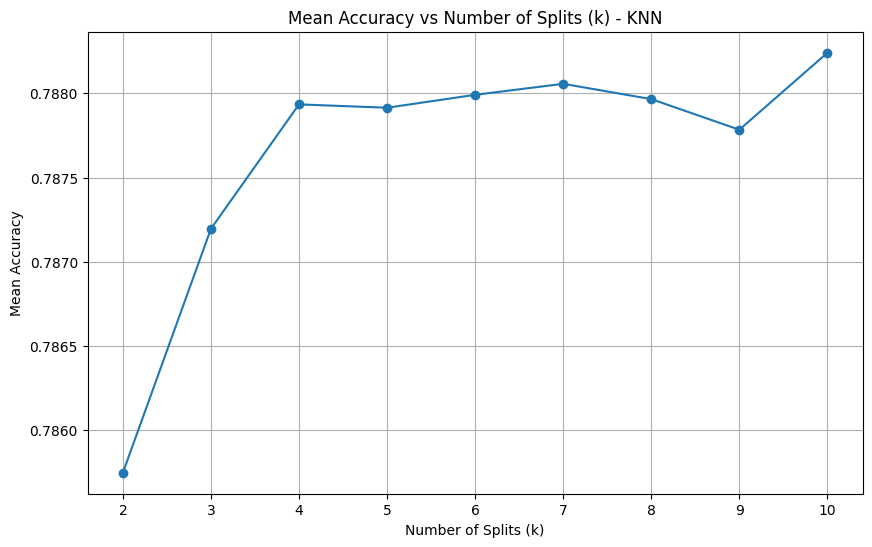

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

X = df2.drop('Target', axis=1)
y = df2['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_classifier = KNeighborsClassifier(n_neighbors=5)

k_values = range(2, 11)
mean_accuracies = []

for k in k_values:
    cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

    y_pred_cv = cross_val_predict(knn_classifier, X, y, cv=cv)

    mean_accuracy = accuracy_score(y, y_pred_cv)
    mean_accuracies.append(mean_accuracy)

best_k_index = np.argmax(mean_accuracies)

best_k = k_values[best_k_index]

print(f'\nClassification Report for the Best Model (k={best_k}):')
cv = StratifiedKFold(n_splits=best_k, shuffle=True, random_state=42)
y_pred_best = cross_val_predict(knn_classifier, X, y, cv=cv)
print(classification_report(y, y_pred_best))

plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_accuracies, marker='o')
plt.title('Mean Accuracy vs Number of Splits (k) - KNN')
plt.xlabel('Number of Splits (k)')
plt.ylabel('Mean Accuracy')
plt.grid(True)
plt.show()



Number of splits (k): 2
Accuracy for each fold: [0.82814762 0.83004968]
Mean accuracy: 0.8290986515259049

Number of splits (k): 3
Accuracy for each fold: [0.83048736 0.83013424 0.83060266]
Mean accuracy: 0.8304080905632616

Number of splits (k): 4
Accuracy for each fold: [0.83107168 0.8328176  0.8343506  0.83013485]
Mean accuracy: 0.8320936834634493

Number of splits (k): 5
Accuracy for each fold: [0.82840667 0.83007452 0.8316714  0.83197303 0.83018098]
Mean accuracy: 0.8304613200851667

Number of splits (k): 6
Accuracy for each fold: [0.83122192 0.83034897 0.82949731 0.83230779 0.8307712  0.83106928]
Mean accuracy: 0.8308694112904819

Number of splits (k): 7
Accuracy for each fold: [0.82872969 0.82922225 0.83210373 0.83066299 0.83463745 0.83287379
 0.83043943]
Mean accuracy: 0.8312384759005764

Number of splits (k): 8
Accuracy for each fold: [0.82955287 0.83190916 0.83117104 0.82969482 0.83335699 0.83341377
 0.83222143 0.82992193]
Mean accuracy: 0.8314052519517388

Number of splits 

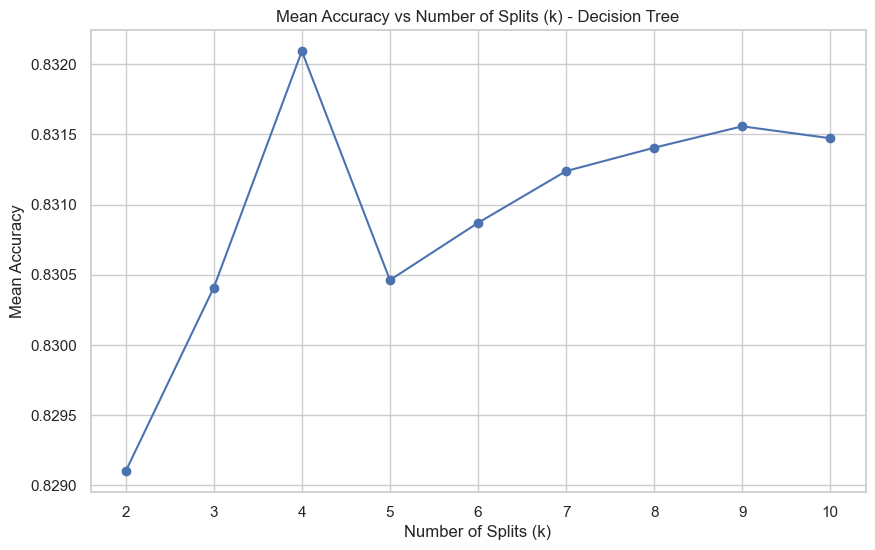


Best k for cross-validation: 4
Cross-validation scores with best k: [0.83107168 0.8328176  0.8343506  0.83013485]
Accuracy on test set: 0.83

Classification Report on test set:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89     54270
           1       0.64      0.62      0.63     16180

    accuracy                           0.83     70450
   macro avg       0.76      0.76      0.76     70450
weighted avg       0.83      0.83      0.83     70450



In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

X = df2.drop('Target', axis=1)
y = df2['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_classifier = DecisionTreeClassifier(random_state=42)

k_values = range(2, 11)
mean_accuracies = []

for k in k_values:
    cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

    scores = cross_val_score(dt_classifier, X_train, y_train, cv=cv)

    mean_accuracy = scores.mean()
    mean_accuracies.append(mean_accuracy)

    print(f'\nNumber of splits (k): {k}')
    print(f'Accuracy for each fold: {scores}')
    print(f'Mean accuracy: {mean_accuracy}')

plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_accuracies, marker='o')
plt.title('Mean Accuracy vs Number of Splits (k) - Decision Tree')
plt.xlabel('Number of Splits (k)')
plt.ylabel('Mean Accuracy')
plt.grid(True)
plt.show()

best_k = k_values[mean_accuracies.index(max(mean_accuracies))]
best_cv = StratifiedKFold(n_splits=best_k, shuffle=True, random_state=42)
best_scores = cross_val_score(dt_classifier, X_train, y_train, cv=best_cv)

dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print(f"\nBest k for cross-validation: {best_k}")
print(f"Cross-validation scores with best k: {best_scores}")
print(f"Accuracy on test set: {accuracy:.2f}")
print("\nClassification Report on test set:\n", classification_report_result)
